In [1]:
# Inorder to install prophet wun this command 
# !pip install prophet

In [2]:
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from itertools import product


In [4]:
import os
os.getcwd()
os.chdir('..')


In [5]:
df = pd.read_csv('Data-sets\\nepal_goldprice_.csv')  #Data of Gold price in Nepal market from 2022 to 
df.head()

,Date in A.D,Date In B.S,Gold Rate Per Tola
0,01-03-2025,09/19/2081,"1,53,500/-"
1,01-02-2025,09/18/2081,"1,51,500/-"
2,01-01-2025,09/17/2081,"1,51,000/-"
3,12/31/2024,09/16/2081,"1,49,600/-"
4,12/30/2024,09/15/2081,"1,50,200/-"


In [6]:
df.shape

(568, 3)

In [7]:
df.isnull().sum()

Date in A.D            0
Date In B.S            0
Gold Rate Per Tola     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date in A.D          568 non-null    object
 1   Date In B.S          568 non-null    object
 2   Gold Rate Per Tola   568 non-null    object
dtypes: object(3)
memory usage: 13.4+ KB


In [9]:
# Clean column names
df.columns = df.columns.str.strip()

In [10]:
# Replace '-' with '/' in 'Date in A.D' to standardize the format since previously date were in 2 formats i.e (01-03-2025 and 12/30/2024) 
df['Date in A.D'] = df['Date in A.D'].str.replace('-', '/')
df['Date In B.S'] = df['Date In B.S'].str.replace('-', '/')

In [11]:
df.head()

,Date in A.D,Date In B.S,Gold Rate Per Tola
0,01/03/2025,09/19/2081,"1,53,500/-"
1,01/02/2025,09/18/2081,"1,51,500/-"
2,01/01/2025,09/17/2081,"1,51,000/-"
3,12/31/2024,09/16/2081,"1,49,600/-"
4,12/30/2024,09/15/2081,"1,50,200/-"


In [12]:
# Convert to datetime
df['Date in A.D'] = pd.to_datetime(df['Date in A.D'], errors='coerce')
df['Date In B.S'] = pd.to_datetime(df['Date In B.S'], errors='coerce')

In [13]:
# Clean and convert 'Gold Rate Per Tola' to numeric
df['Gold Rate Per Tola'] = df['Gold Rate Per Tola'].str.replace(r'[^\d]', '', regex=True).astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date in A.D         568 non-null    datetime64[ns]
 1   Date In B.S         558 non-null    datetime64[ns]
 2   Gold Rate Per Tola  568 non-null    int32         
dtypes: datetime64[ns](2), int32(1)
memory usage: 11.2 KB


In [15]:
df.drop(columns=['Date In B.S'],inplace=True)
df.isnull().sum()

Date in A.D           0
Gold Rate Per Tola    0
dtype: int64

In [16]:
df.shape

(568, 2)

In [17]:
# Extract the year from the 'Date in A.D' column
df['Year'] = df['Date in A.D'].dt.year

# Count the number of records for each year
year_counts = df['Year'].value_counts()

print(year_counts)

Year
2024    299
2023    266
2025      3
Name: count, dtype: int64


In [18]:
df.head(3)

,Date in A.D,Gold Rate Per Tola,Year
0,2025-01-03,153500,2025
1,2025-01-02,151500,2025
2,2025-01-01,151000,2025


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date in A.D', ylabel='Gold Rate Per Tola'>

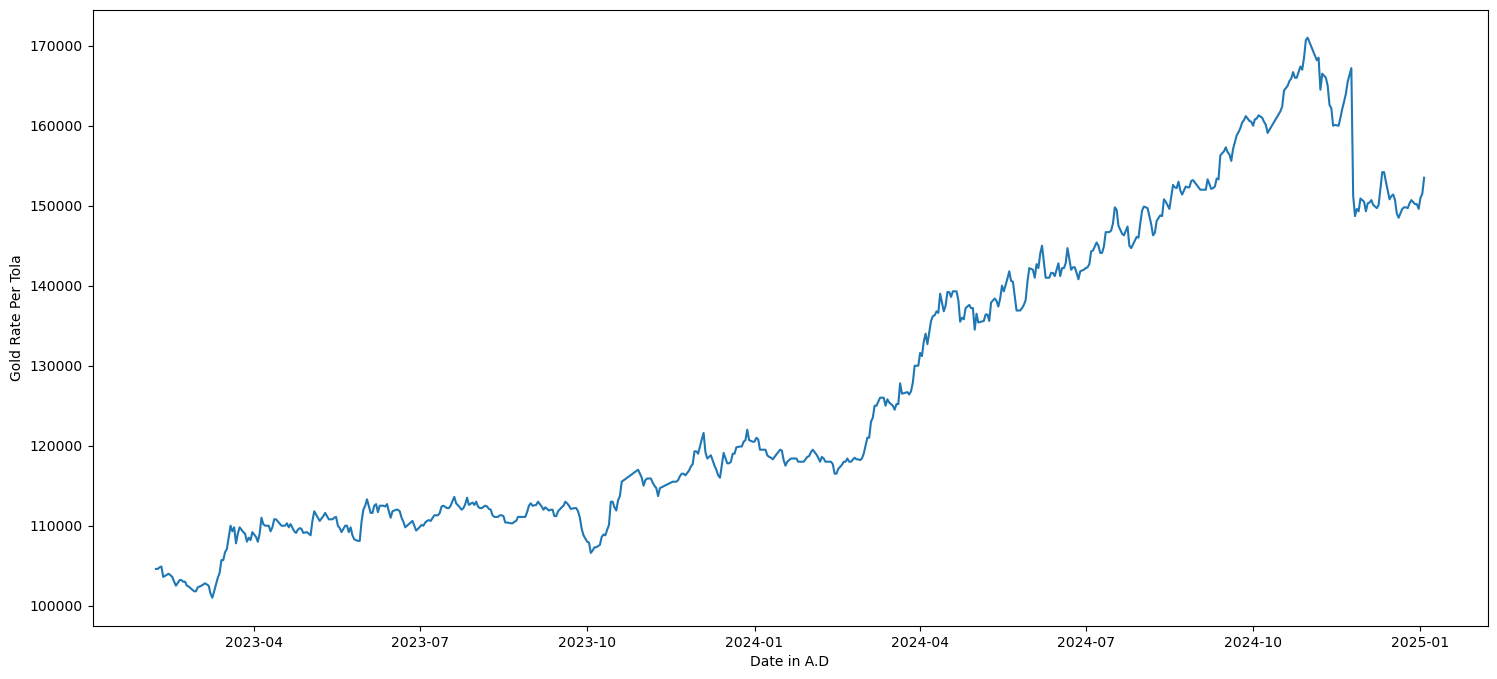

In [19]:
plt.figure(figsize=(18,8))
sns.lineplot(data=df,x='Date in A.D',y='Gold Rate Per Tola')

In [20]:
df.drop(columns=['Year'],inplace=True)
 #In order to use prophet the datestamp feature should be named as 'ds' and 'y' should be the name of numerical column
df.rename(columns={                        
    'Date in A.D': 'ds',
    'Gold Rate Per Tola': 'y'
}, inplace=True)


In [21]:
df.shape

(568, 2)

## Train test split

In [22]:
#Train test split
# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)  # Maintain time order


In [23]:
print("Size of training data: ",train_df.shape,"Size of testing data: ",test_df.shape)

Size of training data:  (454, 2) Size of testing data:  (114, 2)


# Creating an instance of Prophet class

In [24]:
m = Prophet()   #Instance of Prophet class

In [25]:
model = m.fit(train_df)   #Call the fit method and pass the dataframe

12:29:27 - cmdstanpy - INFO - Chain [1] start processing
12:29:27 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Create future dataframe for test data with only the date columns
future = test_df[['ds']]

In [27]:
# Forecast on the test set
forecast = m.predict(future)

In [28]:
# Evaluate the model
y_true = test_df['y']
y_pred = forecast['yhat']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 2984.331170016367
MSE: 17510117.895229004
RMSE: 4184.509277708558


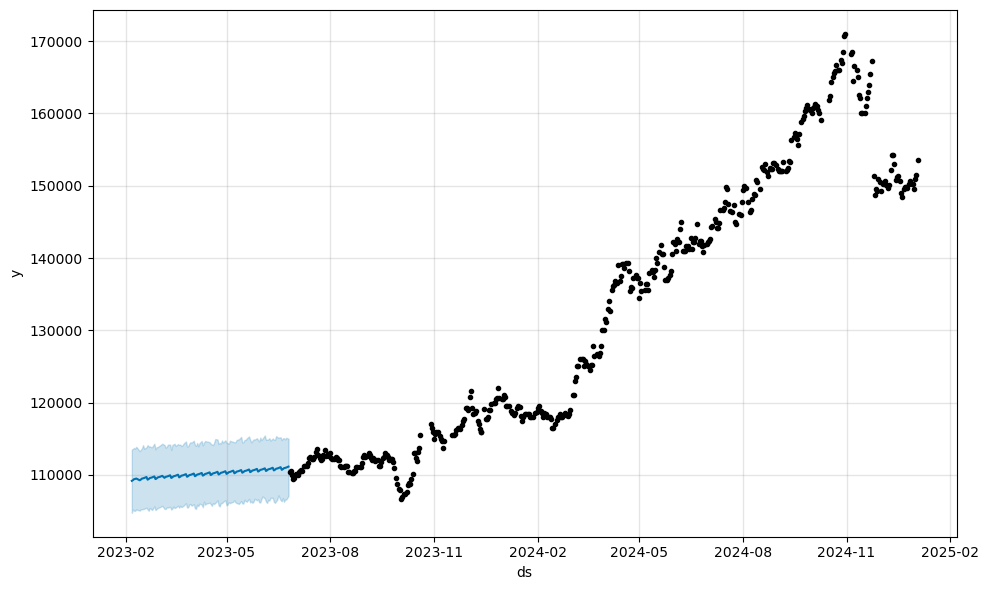

In [29]:
fig1 = m.plot(forecast)


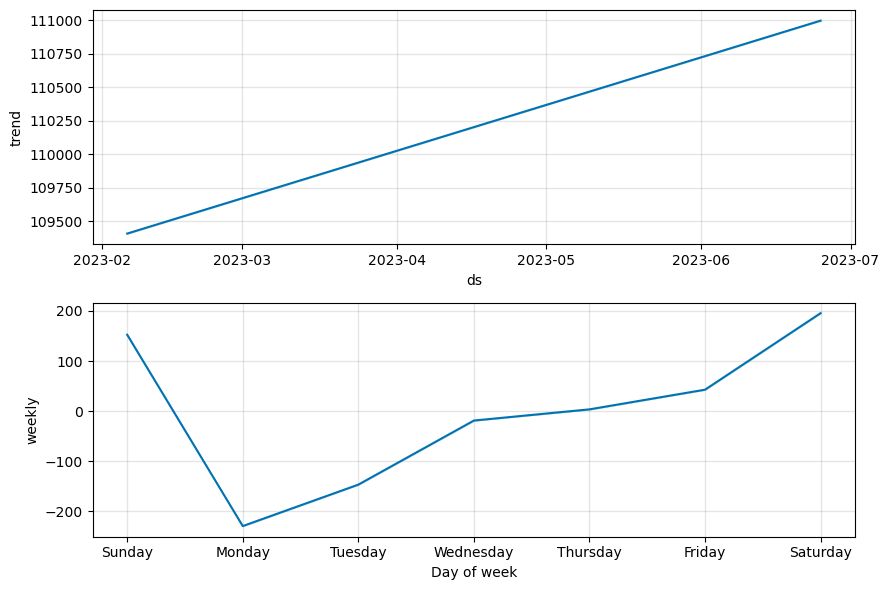

In [30]:
fig2 = m.plot_components(forecast)


## Hyper paramater tunning for prophet

In [32]:
import itertools
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the parameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    # 'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    # 'seasonality_mode': ['additive', 'multiplicative'],
    # 'interval_width': [0.80, 0.95],
    # 'changepoint_range': [0.8, 0.9],
    # 'uncertainty_samples': [1000, 2000],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Initialize a list to store results
results = []

# Perform grid search
for i, params in enumerate(all_params, start=1):
    # Initialize the model with the current parameters
    m = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        # holidays_prior_scale=params['holidays_prior_scale'],
        # seasonality_mode=params['seasonality_mode'],
        # interval_width=params['interval_width'],
        # changepoint_range=params['changepoint_range'],
        # uncertainty_samples=params['uncertainty_samples']
    )
    
    # Train the model
    m.fit(train_df)

    # Predict on the test set
    future = test_df[['ds']]
    forecast = m.predict(future)

    # Evaluate the model
    y_true = test_df['y']
    y_pred = forecast['yhat']

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Append the results with parameters
    results.append({
        'params': params,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

    # Print metrics for the current combination
    print(f"Combination {i}/{len(all_params)}: {params}")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")
    print('-' * 50)

# Display the results of all combinations
sorted_results = sorted(results, key=lambda x: x['RMSE'])
for res in sorted_results:
    print(f"Params: {res['params']}, MAE: {res['MAE']:.2f}, MSE: {res['MSE']:.2f}, RMSE: {res['RMSE']:.2f}")


12:29:40 - cmdstanpy - INFO - Chain [1] start processing
12:29:40 - cmdstanpy - INFO - Chain [1] done processing
12:29:40 - cmdstanpy - INFO - Chain [1] start processing
12:29:40 - cmdstanpy - INFO - Chain [1] done processing


Combination 1/16: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}
MAE: 12115.47, MSE: 199556159.88, RMSE: 14126.43
--------------------------------------------------
Combination 2/16: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}
MAE: 12339.34, MSE: 205437297.68, RMSE: 14333.08
--------------------------------------------------


12:29:40 - cmdstanpy - INFO - Chain [1] start processing
12:29:40 - cmdstanpy - INFO - Chain [1] done processing
12:29:40 - cmdstanpy - INFO - Chain [1] start processing
12:29:40 - cmdstanpy - INFO - Chain [1] done processing


Combination 3/16: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0}
MAE: 12239.90, MSE: 203013955.98, RMSE: 14248.30
--------------------------------------------------
Combination 4/16: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0}
MAE: 12205.44, MSE: 202105622.75, RMSE: 14216.39
--------------------------------------------------


12:29:41 - cmdstanpy - INFO - Chain [1] start processing
12:29:41 - cmdstanpy - INFO - Chain [1] done processing
12:29:41 - cmdstanpy - INFO - Chain [1] start processing
12:29:41 - cmdstanpy - INFO - Chain [1] done processing


Combination 5/16: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}
MAE: 5204.54, MSE: 32023063.80, RMSE: 5658.89
--------------------------------------------------


12:29:41 - cmdstanpy - INFO - Chain [1] start processing


Combination 6/16: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1}
MAE: 5165.95, MSE: 31528244.76, RMSE: 5615.00
--------------------------------------------------


12:29:41 - cmdstanpy - INFO - Chain [1] done processing
12:29:41 - cmdstanpy - INFO - Chain [1] start processing
12:29:41 - cmdstanpy - INFO - Chain [1] done processing


Combination 7/16: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0}
MAE: 5158.54, MSE: 31435921.07, RMSE: 5606.77
--------------------------------------------------
Combination 8/16: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0}
MAE: 5131.57, MSE: 31115254.96, RMSE: 5578.10
--------------------------------------------------


12:29:41 - cmdstanpy - INFO - Chain [1] start processing
12:29:42 - cmdstanpy - INFO - Chain [1] done processing
12:29:42 - cmdstanpy - INFO - Chain [1] start processing


Combination 9/16: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01}
MAE: 3617.43, MSE: 23041104.50, RMSE: 4800.12
--------------------------------------------------


12:29:42 - cmdstanpy - INFO - Chain [1] done processing
12:29:42 - cmdstanpy - INFO - Chain [1] start processing


Combination 10/16: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1}
MAE: 3576.46, MSE: 22776524.45, RMSE: 4772.48
--------------------------------------------------


12:29:42 - cmdstanpy - INFO - Chain [1] done processing
12:29:42 - cmdstanpy - INFO - Chain [1] start processing


Combination 11/16: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0}
MAE: 3652.61, MSE: 23270799.41, RMSE: 4823.98
--------------------------------------------------


12:29:42 - cmdstanpy - INFO - Chain [1] done processing
12:29:42 - cmdstanpy - INFO - Chain [1] start processing


Combination 12/16: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}
MAE: 3592.85, MSE: 22891767.14, RMSE: 4784.53
--------------------------------------------------


12:29:43 - cmdstanpy - INFO - Chain [1] done processing
12:29:43 - cmdstanpy - INFO - Chain [1] start processing


Combination 13/16: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}
MAE: 5513.20, MSE: 36955704.72, RMSE: 6079.12
--------------------------------------------------


12:29:43 - cmdstanpy - INFO - Chain [1] done processing
12:29:43 - cmdstanpy - INFO - Chain [1] start processing


Combination 14/16: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1}
MAE: 5545.80, MSE: 37382534.88, RMSE: 6114.13
--------------------------------------------------


12:29:43 - cmdstanpy - INFO - Chain [1] done processing
12:29:43 - cmdstanpy - INFO - Chain [1] start processing


Combination 15/16: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0}
MAE: 5682.00, MSE: 39114242.57, RMSE: 6254.14
--------------------------------------------------


12:29:44 - cmdstanpy - INFO - Chain [1] done processing


Combination 16/16: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0}
MAE: 5680.95, MSE: 39099257.25, RMSE: 6252.94
--------------------------------------------------
Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1}, MAE: 3576.46, MSE: 22776524.45, RMSE: 4772.48
Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}, MAE: 3592.85, MSE: 22891767.14, RMSE: 4784.53
Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01}, MAE: 3617.43, MSE: 23041104.50, RMSE: 4800.12
Params: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0}, MAE: 3652.61, MSE: 23270799.41, RMSE: 4823.98
Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0}, MAE: 5131.57, MSE: 31115254.96, RMSE: 5578.10
Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0}, MAE: 5158.54, MSE: 31435921.07, RMSE: 5606.77
Params: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1}, MAE: 5165.95, MSE:

In [ ]:
# Find the best parameters
best_result = min(results, key=lambda x: x['RMSE'])
best_params = best_result['params']

print("Best Parameters:", best_params)
print(f"MAE: {best_result['MAE']}")
print(f"MSE: {best_result['MSE']}")
print(f"RMSE: {best_result['RMSE']}")


In [ ]:
print('Errors before hyper paramater tunning')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

print("Errors after hyper paramater tunning", best_params)
print(f"MAE: {best_result['MAE']}")
print(f"MSE: {best_result['MSE']}")
print(f"RMSE: {best_result['RMSE']}")


## Best performing paramaters are:
Best Parameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive', 'interval_width': 0.8, 'changepoint_range': 0.9, 'uncertainty_samples': 1000}
MAE: 3604.745139278288
MSE: 20180374.673488777
RMSE: 4492.2571913781585

## Prediction for future using the optimal paramater for prophet

In [ ]:
# Optimization: Add seasonality and tune hyperparameters
# Retrain the model with the best parameters
best_model = Prophet(
   changepoint_prior_scale= 0.1, seasonality_prior_scale= 0.01, 
    holidays_prior_scale= 0.01, seasonality_mode= 'additive', interval_width= 0.8, 
    changepoint_range= 0.9, uncertainty_samples= 1000
)
best_model.fit(train_df)


In [ ]:
# Predict for the next 30 days
future_30 = best_model.make_future_dataframe(periods=30)
forecast_30 = best_model.predict(future_30)

# Plot the forecast
fig1 = best_model.plot(forecast_30)
fig2 = best_model.plot_components(forecast_30)

In [ ]:
# Display the final 30-day prediction
(forecast_30[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))


In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(best_model, forecast_30)

In [ ]:
plot_components_plotly(best_model, forecast_30)